In [1]:
import os
import glob 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
datapath = "/Users/dominicburrows/Documents/PhD/Imaging/181217_grin_Gc6s_SA_15%/F1_10x15_181217_grin_suite2p/"
os.chdir(datapath)   #set current directory to datapath
planes = sorted(glob.glob("plane*"))   #list all planes in each folder   
plane_no = 10
coord = list((range(plane_no)))
signal = list((range(plane_no)))
cells = list((range(plane_no)))

In [3]:
for i in range(plane_no):
    os.chdir(datapath + "/" + "plane" + str(i))   #make current directory the plane folder we are looping through 
    allcells = np.load("iscell.npy")  #allcells loads iscell.npy (contains prob of being a cell) file into array
    fl = np.load("F.npy") [allcells [:,1] > 0.5, :] #fl loads F.npy, but calls only the row numbers which in x are above 0.5
    stats = np.load("stat.npy") [allcells [:,1] > 0.5]  #stats loads stat.npy for only rows above 0.5 in iscell
    xy = np.zeros((len(stats),2))     #xy variable filled with zeros with size of stats array
        
    for  j in range (len(stats)):          #loop through length of stats
        xy [j,] = stats [j] ['med']   #fills centers matrix with info about cell number (j) and corresponding med values for each cell
    
    xyz = np.concatenate([xy, np.full((len(fl), 1), i)], axis = 1)
    coord[i] = xyz
    signal[i] = fl
    

In [4]:
com_coord = np.concatenate((coord [0], coord [1], coord [2], coord [3], coord[4], coord[5], coord[6], coord[7], coord[8], coord[9]))
com_signal = np.concatenate((signal [0], signal [1], signal [2], signal [3], signal[4], signal[5], signal[6], signal[7], signal[8], signal[9]))

In [6]:
os.chdir(datapath)
np.save("com_coord.npy", com_coord)
np.save("com_signal.npy", com_signal)
np.save("int_com_signal.npy", com_signal.astype("int"))

In [61]:
from scipy import signal

fs = 9828  # Sampling frequency
celln = com_signal.shape[0]
filt_comb = list((range(celln)))
mini = list((range(celln)))
maxi = list((range(celln)))

for i in range (celln):
    trace = com_signal [i,:]
    # Generate the time vector properly
    t = np.arange(9828)     #generate 9828 point, evenly spaced in range 0 - 1. 

    signala = trace
    signalb = np.sin(2*np.pi*20*t) # setting filter with sin wave of specific frequency (20)
    signalc = signala + signalb

    fc = 150
    # Cut-off frequency of the filter, anything higher will not be included
    w = fc / (fs / 2) # Normalize the frequency
    b, a = signal.butter(5, w, 'low')
    filt = signal.filtfilt(b, a, signalc)
    filt_comb[i] = filt
    maxi[i] = max(filt)
    mini[i] = min(filt)

In [78]:
maxir = np.asarray(maxi)
minir = np.asarray(mini)

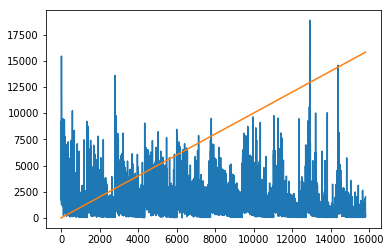

In [79]:
plt.plot(maxir, label = max)
plt.plot(minir, label = min)

In [88]:
maxi[1]

5394.680541907979